In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9326006802749665704
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4990763008
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16583193304800499357
physical_device_desc: "device: 0, name: GeForce GTX 1660, pci bus id: 0000:02:00.0, compute capability: 7.5"
]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
 #Loading cifar
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
LABELS = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
HEIGHT = x_train.shape[1]
WIDTH = x_train.shape[2]
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print("HEIGHT", HEIGHT)
print("WIDTH", WIDTH)
print(y_train[1][0])

HEIGHT 32
WIDTH 32
0.0


X train shape (50000, 32, 32, 3)
Y train shape (50000, 10)


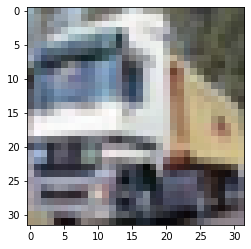

In [3]:
#Checking the ds 
print("X train shape", x_train.shape)
print("Y train shape", y_train.shape)
plt.imshow(x_train[1])

In [4]:
x_train.shape[1::]

(32, 32, 3)

In [5]:
#Let's implement The famous Yann Le Cunn conv nets architectures 
class leNet5(): 
    
    def __init__(self, x_train, y_train, labels): 
        self.model = tf.keras.Sequential()
        self.input_shape = x_train.shape[1::]
        self.labels = labels
        self.x_train = x_train 
        self.y_train = y_train 
    
    def build(self): 
        self.model.add(tf.keras.layers.Conv2D(strides=1,filters=6, kernel_size=5, input_shape=self.input_shape))
        self.model.add(tf.keras.layers.MaxPooling2D())
        
        self.model.add(tf.keras.layers.Conv2D(strides=1,filters=16, kernel_size=5))
        self.model.add(tf.keras.layers.MaxPooling2D())
        self.model.add(tf.keras.layers.Flatten())

        self.model.add(tf.keras.layers.Dense(units=120, activation="relu"))
        self.model.add(tf.keras.layers.Dense(units=84, activation="relu"))
        self.model.add(tf.keras.layers.Dense(units=len(self.labels), activation="softmax"))
        self.model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
        
    def get_classe(self, idx): 
        return self.labels[idx]
    
    def summary(self): 
        return self.model.summary()
    
    def fit(self): 
        return self.model.fit(self.x_train, self.y_train, epochs=100, batch_size=32) 
    
    def predict(self, x): 
        return self.model.predict(x)
        
    
    #Intializing the model

In [6]:
model = leNet5(x_train, y_train, LABELS)
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [7]:
model.fit()

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 169us/sample - loss: 2.4556 - accuracy: 0.3106
Epoch 2/100
50000/50000 [==============================] - 6s 120us/sample - loss: 1.5972 - accuracy: 0.4279
Epoch 3/100
50000/50000 [==============================] - 6s 127us/sample - loss: 1.4458 - accuracy: 0.4891
Epoch 4/100
50000/50000 [==============================] - 6s 117us/sample - loss: 1.3590 - accuracy: 0.5211
Epoch 5/100
50000/50000 [==============================] - 6s 128us/sample - loss: 1.2882 - accuracy: 0.5472
Epoch 6/100
50000/50000 [==============================] - 6s 121us/sample - loss: 1.2265 - accuracy: 0.5678
Epoch 7/100
50000/50000 [==============================] - 6s 117us/sample - loss: 1.1780 - accuracy: 0.5866
Epoch 8/100
50000/50000 [==============================] - 5s 103us/sample - loss: 1.1390 - accuracy: 0.6017
Epoch 9/100
50000/50000 [==============================] - 6s 111us/sample - loss: 1.1204 - accuracy: 0.6

50000/50000 [==============================] - 5s 102us/sample - loss: 0.5511 - accuracy: 0.8141
Epoch 76/100
50000/50000 [==============================] - 5s 100us/sample - loss: 0.5711 - accuracy: 0.8109
Epoch 77/100
50000/50000 [==============================] - 5s 105us/sample - loss: 0.5635 - accuracy: 0.8108
Epoch 78/100
50000/50000 [==============================] - 5s 108us/sample - loss: 0.5610 - accuracy: 0.8105
Epoch 79/100
50000/50000 [==============================] - 5s 107us/sample - loss: 0.5747 - accuracy: 0.8096
Epoch 80/100
50000/50000 [==============================] - 5s 109us/sample - loss: 0.5609 - accuracy: 0.8114
Epoch 81/100
50000/50000 [==============================] - 7s 140us/sample - loss: 0.5952 - accuracy: 0.8035
Epoch 82/100
50000/50000 [==============================] - 6s 125us/sample - loss: 0.5464 - accuracy: 0.8168
Epoch 83/100
50000/50000 [==============================] - 7s 141us/sample - loss: 0.5635 - accuracy: 0.8119
Epoch 84/100
50000/5000